Đầu tiên ta cần khai báo những thư viện cần thiết

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Ta tiến hành đọc file `fuel.csv` và xoá đi cột `Unnamed: 0`

In [16]:
df = pd.read_csv('fuel.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Years,Price
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


Ta tiến thành chia dữ liệu thành `x_train`, `y_train`, `x_test`, `y_test`

In [17]:
x = df['Years']
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

Ta gọi đối tượng `LinearRegression` và dự đoán trên tập test

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

mse = mean_squared_error(y_test, pred)
mse

37784662.466212995

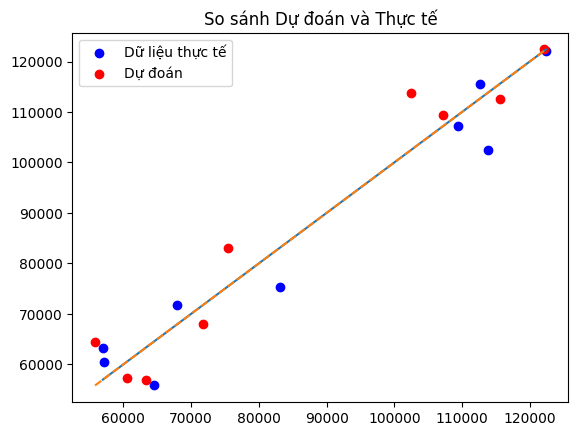

In [22]:
plt.scatter(y_test, pred, c='blue', label='Dữ liệu thực tế')
plt.scatter(pred, y_test, c='red', label='Dự đoán')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-')
plt.plot([min(pred), max(pred)], [min(pred), max(pred)], linestyle='--')
plt.legend()
plt.title("So sánh Dự đoán và Thực tế");

Nhận xét: Do là mô hình khá cơ bản nên `Linear Regression` cho ra một kết quả không thực sự ấn tượng mà chỉ nằm ở mức chấp nhận được, ta có thể thấy:
* MSE là khá lớn
* Có những điểm dữ liệu dự đoán thì nằm rất gần dữ liệu thực tế, nhưng cũng có một số điểm ở rất xa

**`Em nghĩ nếu sử dụng mô hình này trong những bài toán thực tế kiểu thế này thì độ hiệu quả và chính xác sẽ không cao`**